In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm, colors
sns.set_theme()

import os
os.chdir("..")
import init_simple_mdp as imdp

In [4]:
def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [6]:
df = pd.read_csv('results/player10_noturn_results.csv')
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

In [7]:
epsilon_list = list(df.epsilon.unique())
epsilon_list = list(range(1,11))
#epsilon_list = [1,2,4,8,16,32,64,128]
epsilon_list = [1,2,3,4,5,6,7,8,9]

In [8]:
df0 = df.loc[df.tokens==0].copy()

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df0.loc[df0.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


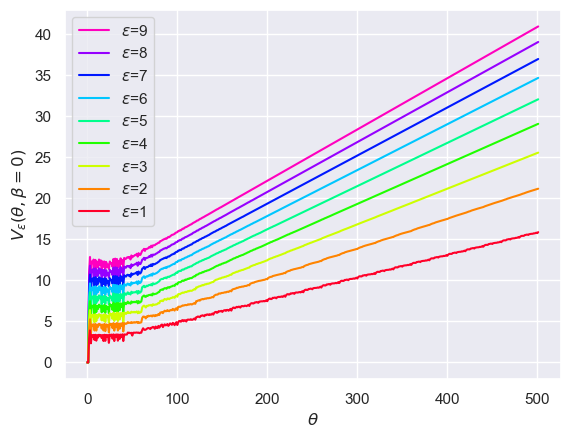

In [10]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon=epsilon_list[e]
    e_leg.append('$\epsilon$={}'.format(epsilon))
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(epsilon_dfs[e],color=color)

fig = plt.legend(e_leg) 
#fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel(r'$\theta$')
#fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel(r'$V_{\epsilon}(\theta,\beta=0)$')
fig = plt.legend(e_leg)